In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab


In [2]:
df=pd.read_csv('C:/Users/Yashw/Downloads/FitBit data.csv')

# 1. Id: The customer ID
2. ActivityDate: The date for which the activity is getting tracked.
3. TotalSteps:  Total Steps taken on that day.
4. TotalDistance: Total distance covered.
5. TrackerDistance: Distance as per the tracker
6. LoggedActivitiesDistance: Logged 
7. VeryActiveDistance: The distance for which the user was the most active. 
8. ModeratelyActiveDistance: The distance for which the user was moderately active.
9. LightActiveDistance: The distance for which the user was the least active.
10. SedentaryActiveDistance: The distance for which the user was almost inactive.
11. VeryActiveMinutes: The number of minutes for the most activity.
12. FairlyActiveMinutes: The number of minutes for moderately activity.
13. LightlyActiveMinutes: The number of minutes for the least activity
14. SedentaryMinutes: The number of minutes for almost no activity
15. Calories(Target): The calories burnt. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [4]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate'])

In [5]:
df=df.drop(columns='ActivityDate')

In [6]:
df.columns

Index(['Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [7]:
df.isnull().sum()

Id                          0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   TotalSteps                457 non-null    int64  
 2   TotalDistance             457 non-null    float64
 3   TrackerDistance           457 non-null    float64
 4   LoggedActivitiesDistance  457 non-null    float64
 5   VeryActiveDistance        457 non-null    float64
 6   ModeratelyActiveDistance  457 non-null    float64
 7   LightActiveDistance       457 non-null    float64
 8   SedentaryActiveDistance   457 non-null    float64
 9   VeryActiveMinutes         457 non-null    int64  
 10  FairlyActiveMinutes       457 non-null    int64  
 11  LightlyActiveMinutes      457 non-null    int64  
 12  SedentaryMinutes          457 non-null    int64  
 13  Calories                  457 non-null    int64  
dtypes: float64

In [9]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [10]:
df.columns

Index(['Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [11]:
df.groupby(['SedentaryActiveDistance'])['SedentaryMinutes'].value_counts()

SedentaryActiveDistance  SedentaryMinutes
0.00                     1440                63
                         1439                 4
                         700                  3
                         748                  3
                         770                  3
                                             ..
0.04                     1129                 1
0.05                     1057                 1
0.06                     1185                 1
                         1295                 1
0.10                     665                  1
Name: SedentaryMinutes, Length: 327, dtype: int64

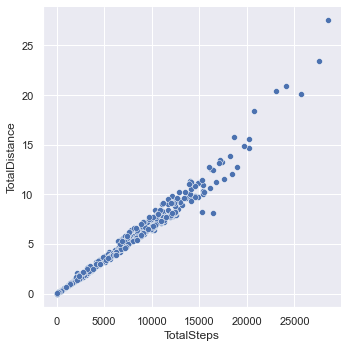

In [12]:
sns.relplot(x='TotalSteps',y='TotalDistance',data=df)

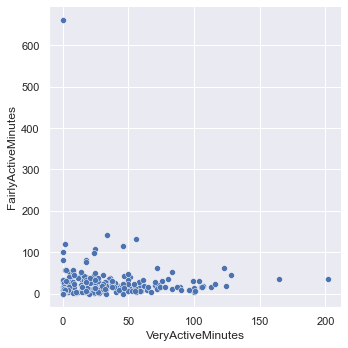

In [13]:
sns.relplot(x='VeryActiveMinutes',y='FairlyActiveMinutes',data=df)

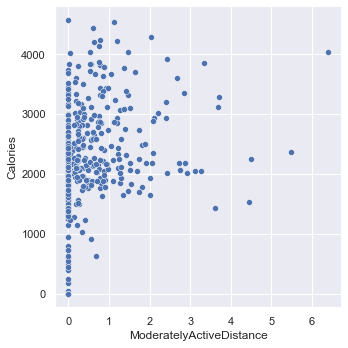

In [14]:
sns.relplot(x='ModeratelyActiveDistance',y='Calories',data=df)

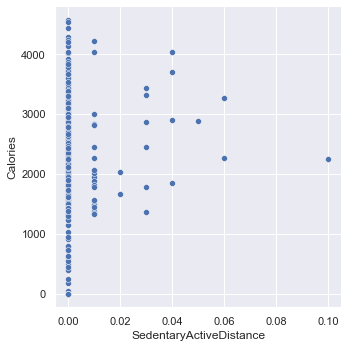

In [15]:
sns.relplot(x='SedentaryActiveDistance',y='Calories',data=df)

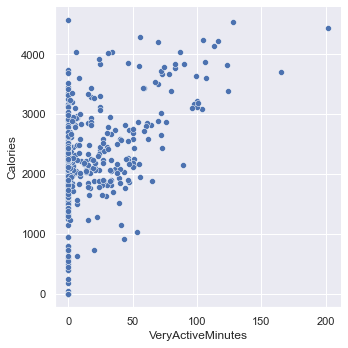

In [16]:
sns.relplot(x='VeryActiveMinutes',y='Calories',data=df)

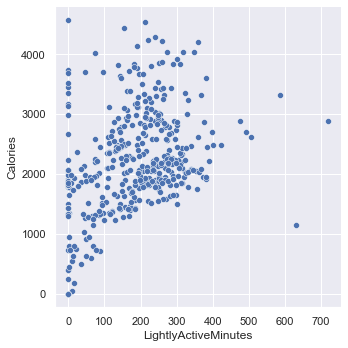

In [17]:
sns.relplot(x='LightlyActiveMinutes',y='Calories',data=df)

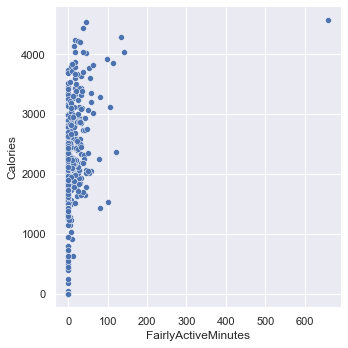

In [18]:
sns.relplot(x='FairlyActiveMinutes',y='Calories',data=df)

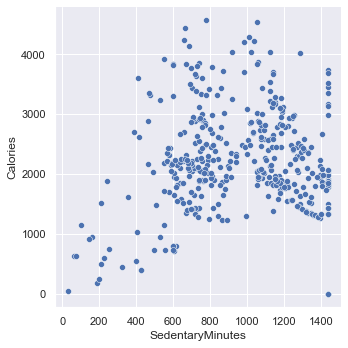

In [19]:
sns.relplot(x='SedentaryMinutes',y='Calories',data=df)

<AxesSubplot:>

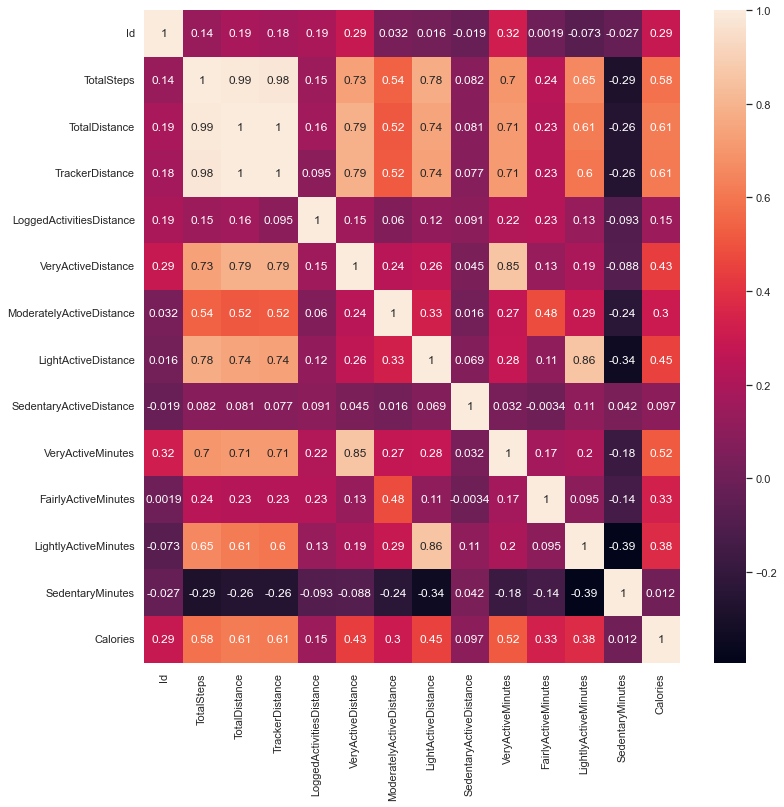

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [32]:
df

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1503960366,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,1503960366,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,1503960366,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,1503960366,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


In [33]:
df.columns

Index(['Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [34]:
X=df[['TotalSteps','TotalDistance','TrackerDistance','VeryActiveMinutes']]
Y=df[['Calories']]

In [35]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=1400)

In [37]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[1651.69742509]
[[-1.71715024e-01  2.88944333e+02  4.77754543e+01  3.41240976e+00]]


In [38]:
y_pred=lm.predict(x_test)

In [39]:
lm.score(x_test,y_test)

0.29307242661133237

In [27]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [28]:
adj_r2(x_test,y_test)

0.3734679216630672

In [29]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  364709.4344788618
MAPE:  6.1553720369120824e+16
MAE:  344.2232458546539


In [30]:
variables = X_scaled
Vif =pd.DataFrame()
Vif['Vif'] = [vif(variables,i) for i in range(variables.shape[1])]
Vif['Features'] = X.columns

In [31]:
Vif

,Vif,Features
0,1.262422,Id
1,70.701781,TotalSteps
2,346.746947,TotalDistance
3,238.042534,TrackerDistance
4,2.583049,LoggedActivitiesDistance
5,18.925196,VeryActiveDistance
6,2.944944,ModeratelyActiveDistance
7,14.158910,LightActiveDistance
8,1.046909,SedentaryActiveDistance
9,5.420460,VeryActiveMinutes


### Inferential Statistics

# Applying One Sample Z-Test on TotalSteps

In [49]:
from statsmodels.stats.weightstats import ztest

In [41]:
df['TotalSteps'].mean()

6546.562363238512

In [46]:
df['TotalSteps'][0:40].mean()

8158.55

In [47]:
df['TotalSteps'].std()

5398.4930638730675

In [48]:
# population mean=6546.5
# sample mean=8158.55
# no. of Sample = 40 
# Standard Deviation = 5398.49

In [51]:
# This is One Sample Z-test
# Here,I am taking Ho=population mean and Ha!=population mean.
zvalue,pvalue=ztest(df['TotalSteps'][0:40],value=6546.5,alternative='two-sided')
print(round(pvalue,2))
if(pvalue>0.05):
    print('accept null hupothesis')
else:
    print('rejecting null hypothesis')
    

0.07
accept null hupothesis


In [52]:
# This is One Sample Z-test
# Here,I am taking Ho<=population mean and Ha>population mean.
zvalue,pvalue=ztest(df['TotalSteps'][0:40],value=6546.5,alternative='larger')
print(round(pvalue,2))
if(pvalue>0.05):
    print('accept null hupothesis')
else:
    print('rejecting null hypothesis')
    

0.03
rejecting null hypothesis


In [53]:
# This is One Sample Z-test
# Here,I am taking Ho>=population mean and Ha<population mean.
zvalue,pvalue=ztest(df['TotalSteps'][0:40],value=6546.5,alternative='smaller')
print(round(pvalue,2))
if(pvalue>0.05):
    print('accept null hupothesis')
else:
    print('rejecting null hypothesis')
    

0.97
accept null hupothesis


## Applying Two-Sample Z-Test TotalDistance and TrackerDistance

In [56]:
print(df['TotalDistance'].mean())
print(df['TrackerDistance'].mean())

4.663522971541309
4.609846824111674


In [69]:
print(df['TotalDistance'][0:33].mean())
print(df['TrackerDistance'][0:33].mean())

5.361818191228492
5.361818191228492


In [68]:
# This is Two-Sample z-test
zvalue,pvalue=ztest(df['TotalDistance'][0:33],df['TrackerDistance'][0:33],value=5,alternative='two-sided')
print(round(pvalue,2))
if(pvalue>0.05):
    print('accept null hupothesis')
else:
    print('rejecting null hypothesis')

0.0
rejecting null hypothesis


In [71]:
# This is Two-Sample z-test
zvalue,pvalue=ztest(df['TotalDistance'][0:33],df['TrackerDistance'][0:33],value=5,alternative='larger')
print(round(pvalue,2))
if(pvalue>0.05):
    print('accept null hupothesis')
else:
    print('rejecting null hypothesis')

1.0
accept null hupothesis


In [72]:
# This is Two-Sample z-test
zvalue,pvalue=ztest(df['TotalDistance'][0:33],df['TrackerDistance'][0:33],value=5,alternative='smaller')
print(round(pvalue,2))
if(pvalue>0.05):
    print('accept null hupothesis')
else:
    print('rejecting null hypothesis')

0.0
rejecting null hypothesis


## Applying T-test on Calories

In [73]:
from scipy.stats import ttest_1samp

In [76]:
df['Calories'].mean()

2189.45295404814

In [84]:
# This is One-Sample T-test.
ttest,pvalue=ttest_1samp(df['Calories'][0:27],2188)
print(pvalue)
if pvalue>0.05:
    print('We are accepting null hypothesis')
else:
    print("we are rejecting null hypothesis")

7.355883920101945e-07
we are rejecting null hypothesis


In [87]:
# This is Two-Sample T-test 
ttest,pval=stats.ttest_rel(df['TotalDistance'],df['TrackerDistance'])
print(pval)
if (pval>0.05):
    print('Accepting null hypothesis')
else:
    print('Rejecting null hypothesis')

0.0045845994537862395
Rejecting null hypothesis


## Applying Annova Test

In [89]:
df=sns.load_dataset('iris')

In [90]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [91]:
# From here we are doing Annova Test 
d_anova=dfi[['petal_width','species']]

In [92]:
grps=pd.unique(d_anova.species.values)

In [93]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [94]:
x={grp:d_anova['petal_width'][d_anova.species==grp] for grp in grps}

In [95]:
x

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [96]:
# Here we applying F-Test after applying Annova Test
F,p=stats.f_oneway(x['setosa'],x['versicolor'],x['virginica'])

In [97]:
print(p)

4.169445839443116e-85


In [99]:

if(p>0.05):
    print('accept null hypothesis')
else:
    print('reject null hypothesis')

reject null hypothesis


## Applying Chi-2 Test

In [100]:
dft=sns.load_dataset('tips')

In [101]:
dft

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [102]:
dt=pd.crosstab(dft['sex'],dft['smoker'])
print(dt)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [103]:
dt.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [104]:
# Chi-Square Test
val=stats.chi2_contingency(dt)

In [105]:
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [112]:
# Here,null hypothesis is that "Two catagorical features are independent of each other" and alternative hypothesis
# is that "Two catagorical features are dependent on each other".
if(val[1]>0.05):
    print('accept null hypothesis')
else:
    print('reject null hypothesis')

accept null hypothesis
